### Question 1 
Load the data and rearrange it as a pandas DataFrame with the following structure:

- One column per stock and concept: Open, High, Low, Close, Volume
- Date as index (properly parsed)
- Rows sorted by date, ascending

Be ready for dealing with errors in the names and some missing values.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("stocks_unclean.csv",parse_dates=["date"], dayfirst=True, index_col="date").sort_index(ascending=True)

In [3]:
df["concept"] = df["variable"].str.extract("([a-zA-Z]+)_")
df["stock"]=df["variable"].str.extract("_([a-zA-Z]+)")
df.head()

,variable,value,concept,stock
date,,,,
2019-12-31,high_GOOG,1.338000e+03,high,GOOG
2019-12-31,high_AAPL,7.342000e+01,high,AAPL
2019-12-31,open_MSFT,1.567700e+02,open,MSFT
2019-12-31,volume_MSFT,1.836940e+07,volume,MSFT
2019-12-31,close_AMZN,1.847840e+03,close,AMZN


In [4]:
df["stock"].value_counts()

AMZN    2591
MSFT    2590
GOOG    2588
AAPL    2565
APL       23
GOG       22
MST       20
AMZ       19
Name: stock, dtype: int64

In [5]:
df["stock"]= df["stock"].replace(["APL","GOG","MST","AMZ"],["AAPL","GOOG","MSFT","AMZN"])

In [6]:
df["stock"].unique()

array(['GOOG', 'AAPL', 'MSFT', 'AMZN', nan], dtype=object)

In [7]:
df["stock"].value_counts()

AMZN    2610
GOOG    2610
MSFT    2610
AAPL    2588
Name: stock, dtype: int64

In [8]:
#handling null values for stocks as they suggest a biased view of the portfolio 
df = df[df['stock'].notna()]

In [9]:
df["stock"].unique()

array(['GOOG', 'AAPL', 'MSFT', 'AMZN'], dtype=object)

In [10]:
newdf = df.pivot_table(values="value", index = ["date"], columns=["stock","concept"])


For the null values handling, i tried using forward fill in order to replace the missing value with the one from the previous row in the dataframe. 
Yet i thought that replacing the null value with an average of the 7 previous days/rows, would be a more accurate and precise way of handling the missing values here.

In [11]:
#handling null values in the values of the stocks

stock = list(newdf.columns.levels[0])
concept = list(newdf.columns.levels[1])

for stocks in stock: 
    for concepts in concept:
        newdf[stocks,concepts] = newdf[stocks,concepts].fillna(newdf[stocks,concepts].rolling(7, min_periods =1).mean())
newdf.head()

stock            AAPL                                                \
concept         close       high        low       open       volume   
date                                                                  
2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600.0   
2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400.0   
2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800.0   
2020-01-06  74.949997  74.989998  73.187500  73.447502  118387200.0   
2020-01-07  74.597504  75.224998  74.370003  74.959999  108872000.0   

stock              AMZN                                               \
concept           close         high          low    open     volume   
date                                                                   
2019-12-31  1847.839966  1853.260010  1832.229980  1842.0  2506500.0   
2020-01-02  1898.010010  1898.010010  1864.150024  1875.0  4029000.0   
2020-01-03  1874.969971  1886.199951  1864.500000  1864.5  3764400.0   
2020-01-06  1902.880005  1903.689941  1860.000000  1860.0  4061800.0   
2020-01-07  1906.859985  1913.890015  1892.040039  1904.5  4044900.0   

stock              GOOG                                                    \
concept           close         high          low         open     volume   
date                                                                        
2019-12-31  1337.020020  1338.000000  1329.084961  1330.109985   961800.0   
2020-01-02  1367.369995  1368.140015  1341.550049  1341.550049  1406600.0   
2020-01-03  1360.660034  1372.500000  1345.543945  1347.859985  1186400.0   
2020-01-06  1394.209961  1396.500000  1338.726318  1350.000000  1732300.0   
2020-01-07  1393.339966  1402.989990  1390.380005  1397.939941  1502700.0   

stock             MSFT                                                  
concept          close        high         low        open      volume  
date                                                                    
2019-12-31  157.699997  157.770004  156.449997  156.770004  18369400.0  
2020-01-02  160.619995  160.729996  158.330002  158.779999  22622100.0  
2020-01-03  158.619995  159.949997  157.389999  158.320007  21116200.0  
2020-01-06  159.029999  159.100006  156.509995  157.080002  20813700.0  
2020-01-07  157.580002  159.669998  157.320007  159.320007  21634100.0

In [12]:
newdf.dtypes

stock  concept
AAPL   close      float64
       high       float64
       low        float64
       open       float64
       volume     float64
AMZN   close      float64
       high       float64
       low        float64
       open       float64
       volume     float64
GOOG   close      float64
       high       float64
       low        float64
       open       float64
       volume     float64
MSFT   close      float64
       high       float64
       low        float64
       open       float64
       volume     float64
dtype: object

### Question 2 
Visualize the data as follows:

- Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).
- Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
- Add meaningful visualizations of your choice (0.5 points)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

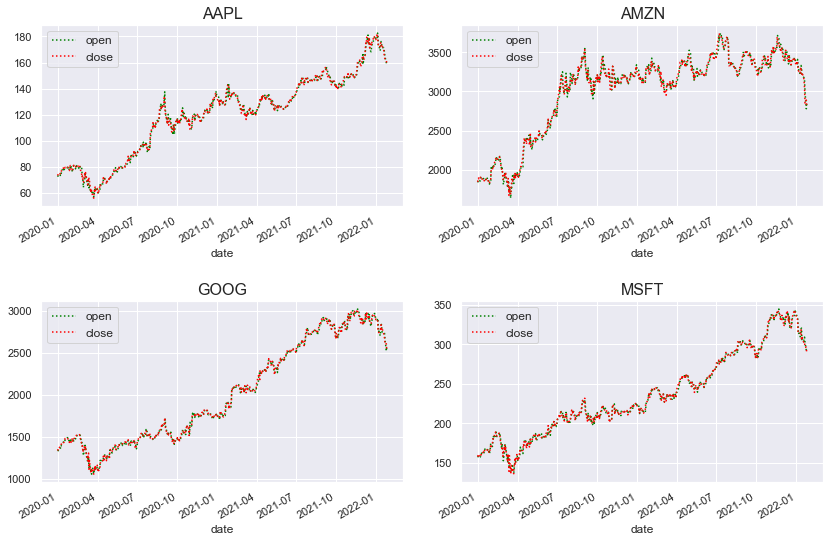

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

newdf["AAPL","open"].plot(color = "green", linestyle="dotted", ax = axes[0,0])
newdf["AAPL","close"].plot(color = "red", linestyle="dotted", ax = axes[0,0])
axes[0,0].set_title("AAPL", fontsize =16)
axes[0,0].legend(['open', 'close'], fontsize=12)

newdf["AMZN","open"].plot(color = "green", linestyle="dotted", ax = axes[0,1])
newdf["AMZN","close"].plot(color = "red", linestyle="dotted",ax = axes[0,1])
axes[0,1].set_title("AMZN", fontsize =16)
axes[0,1].legend(['open', 'close'], fontsize=12)

newdf["GOOG","open"].plot(color = "green", linestyle="dotted", ax = axes[1,0])
newdf["GOOG","close"].plot(color = "red", linestyle="dotted", ax = axes[1,0])
axes[1,0].set_title("GOOG", fontsize =16)
axes[1,0].legend(['open', 'close'], fontsize=12)

newdf["MSFT","open"].plot(color = "green", linestyle="dotted", ax = axes[1,1])
newdf["MSFT","close"].plot(color = "red", linestyle="dotted",ax = axes[1,1])
axes[1,1].set_title("MSFT", fontsize =16)
axes[1,1].legend(['open', 'close'], fontsize=12)

fig.tight_layout(pad=2.0)


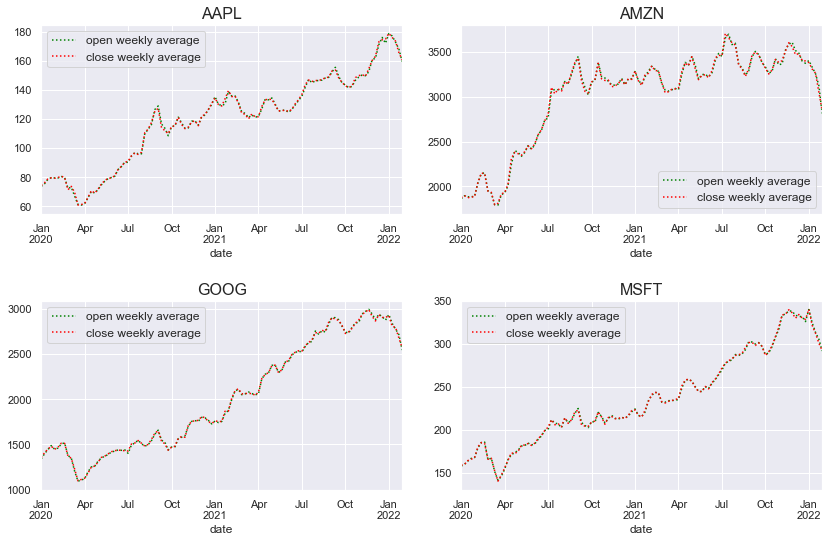

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

newdf["AAPL","open"].resample("W").mean().plot(color = "green", linestyle="dotted", ax = axes[0,0])
newdf["AAPL","close"].resample("W").mean().plot(color = "red", linestyle="dotted", ax = axes[0,0])
axes[0,0].set_title("AAPL", fontsize =16)
axes[0,0].legend(['open weekly average', 'close weekly average'], fontsize=12)

newdf["AMZN","open"].resample("W").mean().plot(color = "green", linestyle="dotted", ax = axes[0,1])
newdf["AMZN","close"].resample("W").mean().plot(color = "red", linestyle="dotted",ax = axes[0,1])
axes[0,1].set_title("AMZN", fontsize =16)
axes[0,1].legend(['open weekly average', 'close weekly average'], fontsize=12)

newdf["GOOG","open"].resample("W").mean().plot(color = "green", linestyle="dotted", ax = axes[1,0])
newdf["GOOG","close"].resample("W").mean().plot(color = "red", linestyle="dotted", ax = axes[1,0])
axes[1,0].set_title("GOOG", fontsize =16)
axes[1,0].legend(['open weekly average', 'close weekly average'], fontsize=12)

newdf["MSFT","open"].resample("W").mean().plot(color = "green", linestyle="dotted", ax = axes[1,1])
newdf["MSFT","close"].resample("W").mean().plot(color = "red", linestyle="dotted",ax = axes[1,1])
axes[1,1].set_title("MSFT", fontsize =16)
axes[1,1].legend(['open weekly average', 'close weekly average'], fontsize=12)

fig.tight_layout(pad=2.0)

 <u> Visualization 1 <u> : 

I saw that there is a drop in values for all stocks between january and july 2020.
I know that amazon and google are on a more similar scale. Same for apple and microsoft.

So i decided to plot the above mentionned together so it's more readable. 
I decided to plot only the opening values, as i beleive it's enough to see the importance of the drop.

Text(0.5, 0.98, 'Variation of openings between Jan-2020 and Apr-2020')

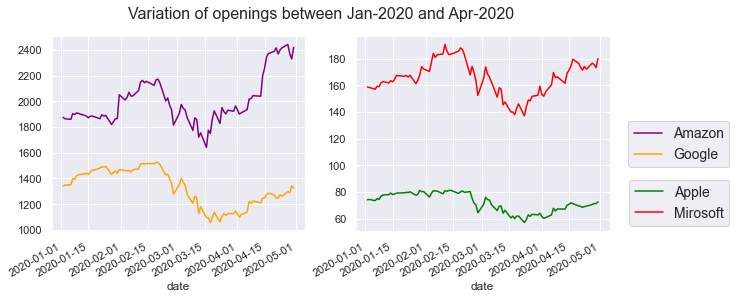

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))


newdf["AMZN","open"].loc["2020-01":"2020-04"].plot(color = "purple", ax = axes[0])
newdf["GOOG","open"].loc["2020-01":"2020-04"].plot(color = "orange",ax = axes[0])
axes[0].legend(["Amazon", "Google"],bbox_to_anchor=(2.7, 0.6), fontsize=14)

newdf["AAPL","open"].loc["2020-01":"2020-04"].plot(color = "green", ax = axes[1])
newdf["MSFT","open"].loc["2020-01":"2020-04"].plot(color = "red", ax = axes[1])
axes[1].legend(['Apple', 'Mirosoft'],bbox_to_anchor=(1.5, 0.3),fontsize=14)

fig.suptitle("Variation of openings between Jan-2020 and Apr-2020", fontsize=16)


 <u> Visualization 2 <u> : 

I was interested in seeing the 1 day returns of each stock over the whole period given to us in this dataset. 
I beleive that returns are interesting to visualize as they give an overall overview of the behavior of a stock. And when comparing these together we can have an idea of the overall variations on the market. 


In [17]:
import numpy as np

Text(0.5, 0.98, 'Returns in one day between 2020 and 2022')

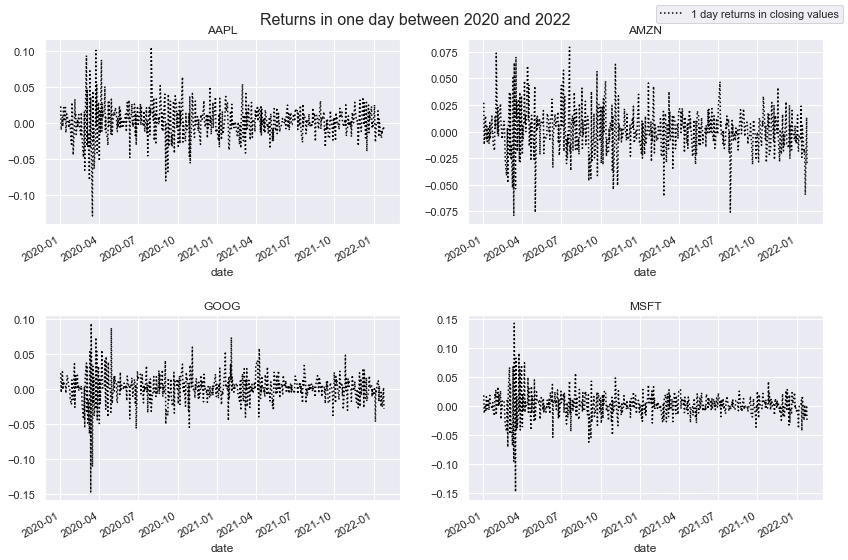

In [18]:
# i am interested in seeing the returns of each stock 
#i use pct_change to calulate the resurns in 1 day 

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

newdf["AAPL","close"].pct_change(1).plot(color = "black", linestyle="dotted", ax = axes[0,0])
axes[0,0].set_title("AAPL")

newdf["AMZN","close"].pct_change(1).plot(color = "black", linestyle="dotted",ax = axes[0,1])
axes[0,1].set_title("AMZN")

newdf["GOOG","close"].pct_change(1).plot(color = "black", linestyle="dotted", ax = axes[1,0])
axes[1,0].set_title("GOOG")

newdf["MSFT","close"].pct_change(1).plot(color = "black", linestyle="dotted",ax = axes[1,1])
axes[1,1].set_title("MSFT")

fig.legend(['1 day returns in closing values'])
fig.tight_layout(pad=2.0)
fig.suptitle("Returns in one day between 2020 and 2022", fontsize=16)

 <u> Visualization 3 <u> : 

I wanted to have a visualisation allowing me to see when the maximum and minimum values of the stocks were (over the given period). And what were these values. So i decided to put a 2 visual markers on the max and min closing values of each stock. It allows you to have an idea of when the maximum and minimum value is appearing for each stock. 

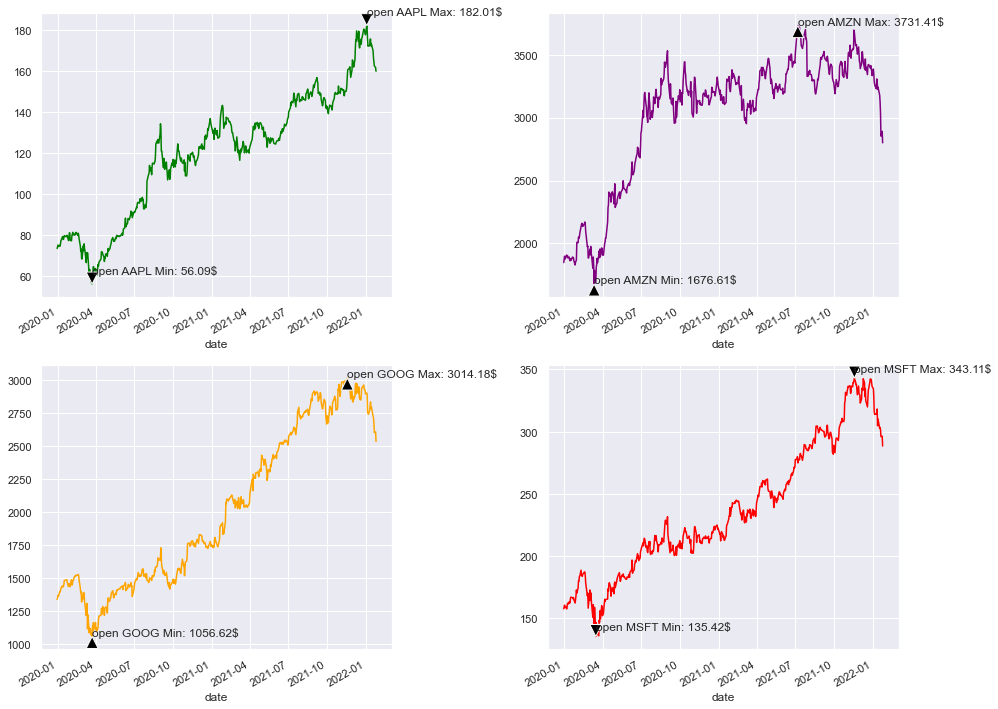

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols =2,figsize=(14,10))

newdf["AAPL","close"].plot(color = "green", ax = axes[0,0])
y0_max = max(newdf["AAPL","close"])
x0_pos = np.where(newdf["AAPL","close"]==y0_max)
x0_max = newdf.index[x0_pos]
axes[0,0].annotate(f"open AAPL Max: {round(y0_max, 2)}$", xy=(x0_max,y0_max), xytext=(x0_max,y0_max +5),
                  arrowprops=dict(facecolor="black"),)

y0_min = min(newdf["AAPL","close"])
x0_pos = np.where(newdf["AAPL","close"]==y0_min)
x0_min = newdf.index[x0_pos]
axes[0,0].annotate(f"open AAPL Min: {round(y0_min, 2)}$", xy=(x0_min,y0_min), xytext=(x0_min,y0_min +5),
                  arrowprops=dict(facecolor="black"),)

newdf["AMZN","close"].plot(color = "purple", ax = axes[0,1])
y0_max = max(newdf["AMZN","close"])
x0_pos = np.where(newdf["AMZN","close"]==y0_max)
x0_max = newdf.index[x0_pos]
axes[0,1].annotate(f"open AMZN Max: {round(y0_max, 2)}$", xy=(x0_max,y0_max), xytext=(x0_max,y0_max +5),
                  arrowprops=dict(facecolor="black"),)

y0_min = min(newdf["AMZN","close"])
x0_pos = np.where(newdf["AMZN","close"]==y0_min)
x0_min = newdf.index[x0_pos]
axes[0,1].annotate(f"open AMZN Min: {round(y0_min, 2)}$", xy=(x0_min,y0_min), xytext=(x0_min,y0_min +5),
                  arrowprops=dict(facecolor="black"),)

newdf["GOOG","close"].plot(color = "orange", ax = axes[1,0])
y0_max = max(newdf["GOOG","close"])
x0_pos = np.where(newdf["GOOG","close"]==y0_max)
x0_max = newdf.index[x0_pos]
axes[1,0].annotate(f"open GOOG Max: {round(y0_max, 2)}$", xy=(x0_max,y0_max), xytext=(x0_max,y0_max +5),
                  arrowprops=dict(facecolor="black"),)

y0_min = min(newdf["GOOG","close"])
x0_pos = np.where(newdf["GOOG","close"]==y0_min)
x0_min = newdf.index[x0_pos]
axes[1,0].annotate(f"open GOOG Min: {round(y0_min, 2)}$", xy=(x0_min,y0_min), xytext=(x0_min,y0_min +5),
                  arrowprops=dict(facecolor="black"),)

newdf["MSFT","close"].plot(color = "red", ax = axes[1,1])
y0_max = max(newdf["MSFT","close"])
x0_pos = np.where(newdf["MSFT","close"]==y0_max)
x0_max = newdf.index[x0_pos]
axes[1,1].annotate(f"open MSFT Max: {round(y0_max, 2)}$", xy=(x0_max,y0_max), xytext=(x0_max,y0_max +5),
                  arrowprops=dict(facecolor="black"),)

y0_min = min(newdf["MSFT","close"])
x0_pos = np.where(newdf["MSFT","close"]==y0_min)
x0_min = newdf.index[x0_pos]
axes[1,1].annotate(f"open MSFT Min: {round(y0_min, 2)}$", xy=(x0_min,y0_min), xytext=(x0_min,y0_min +5),
                  arrowprops=dict(facecolor="black"),)

fig.tight_layout(pad=1.0)


## FAIRE GRAPH AVEC MAX ET MIN

### Question 3
Create a function that calculates the Return of Investment (ROI). Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it. The ROI formula is:


$$ R O I = [(F V I - I V I)/ I V I] * 100 $$

- IVI: initial value of investment. This is the price at which you bought the stock
- FVI: final value of investment. This is the price at which you sold the stock
- ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:

- lookback: the number of days you hold the stock
- name: the name of the stock, using the "Close" value of the stock
- data: the dataframe with the stock data


In [20]:
def roi (lookback, name, data): 
    ROI = (data[f"{name}","close"].pct_change(lookback))*100
    return ROI

In [21]:
roi(365, "GOOG", newdf)

date
2019-12-31          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
                ...    
2022-01-19    81.536180
2022-01-20    78.472691
2022-01-21    75.762010
2022-01-24    73.065534
2022-01-25    66.927462
Name: (GOOG, close), Length: 522, dtype: float64

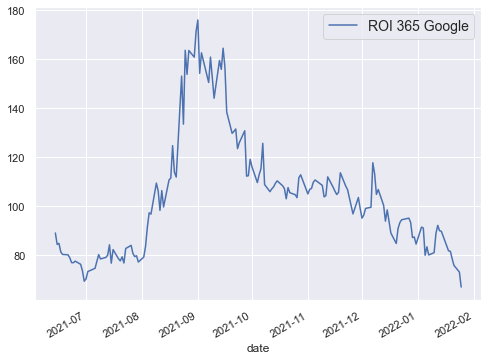

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
roi(365, "GOOG", newdf).plot(label = "ROI 365 Google")
plt.legend(fontsize=14)

### Question 4
Apply the ROI function to the portfolio. Create as many ROI columns as different stocks you have in the portfolio and plot them, representing for each stock:

ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
ROI after holding the stock for 90 days (green, solid line) (0.5 points)


In [23]:
newdf["ROI_AAPL_365"]= roi(365, "AAPL", newdf)
newdf["ROI_AAPL_180"]= roi(180, "AAPL", newdf)
newdf["ROI_AAPL_90"]= roi(90, "AAPL", newdf)

newdf["ROI_AMZN_365"]= roi(365, "AMZN", newdf)
newdf["ROI_AMZN_180"]= roi(180, "AMZN", newdf)
newdf["ROI_AMZN_90"]= roi(90, "AMZN", newdf)

newdf["ROI_GOOG_365"]= roi(365, "GOOG", newdf)
newdf["ROI_GOOG_180"]= roi(180, "GOOG", newdf)
newdf["ROI_GOOG_90"]= roi(90, "GOOG", newdf)

newdf["ROI_MSFT_365"]= roi(365, "MSFT", newdf)
newdf["ROI_MSFT_180"]= roi(180, "MSFT", newdf)
newdf["ROI_MSFT_90"]= roi(90, "MSFT", newdf)

newdf.head()

stock            AAPL                                                \
concept         close       high        low       open       volume   
date                                                                  
2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600.0   
2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400.0   
2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800.0   
2020-01-06  74.949997  74.989998  73.187500  73.447502  118387200.0   
2020-01-07  74.597504  75.224998  74.370003  74.959999  108872000.0   

stock              AMZN                                               ...  \
concept           close         high          low    open     volume  ...   
date                                                                  ...   
2019-12-31  1847.839966  1853.260010  1832.229980  1842.0  2506500.0  ...   
2020-01-02  1898.010010  1898.010010  1864.150024  1875.0  4029000.0  ...   
2020-01-03  1874.969971  1886.199951  1864.500000  1864.5  3764400.0  ...   
2020-01-06  1902.880005  1903.689941  1860.000000  1860.0  4061800.0  ...   
2020-01-07  1906.859985  1913.890015  1892.040039  1904.5  4044900.0  ...   

stock      ROI_AAPL_90 ROI_AMZN_365 ROI_AMZN_180 ROI_AMZN_90 ROI_GOOG_365  \
concept                                                                     
date                                                                        
2019-12-31         NaN          NaN          NaN         NaN          NaN   
2020-01-02         NaN          NaN          NaN         NaN          NaN   
2020-01-03         NaN          NaN          NaN         NaN          NaN   
2020-01-06         NaN          NaN          NaN         NaN          NaN   
2020-01-07         NaN          NaN          NaN         NaN          NaN   

stock      ROI_GOOG_180 ROI_GOOG_90 ROI_MSFT_365 ROI_MSFT_180 ROI_MSFT_90  
concept                                                                    
date                                                                       
2019-12-31          NaN         NaN          NaN          NaN         NaN  
2020-01-02          NaN         NaN          NaN          NaN         NaN  
2020-01-03          NaN         NaN          NaN          NaN         NaN  
2020-01-06          NaN         NaN          NaN          NaN         NaN  
2020-01-07          NaN         NaN          NaN          NaN         NaN  

[5 rows x 32 columns]

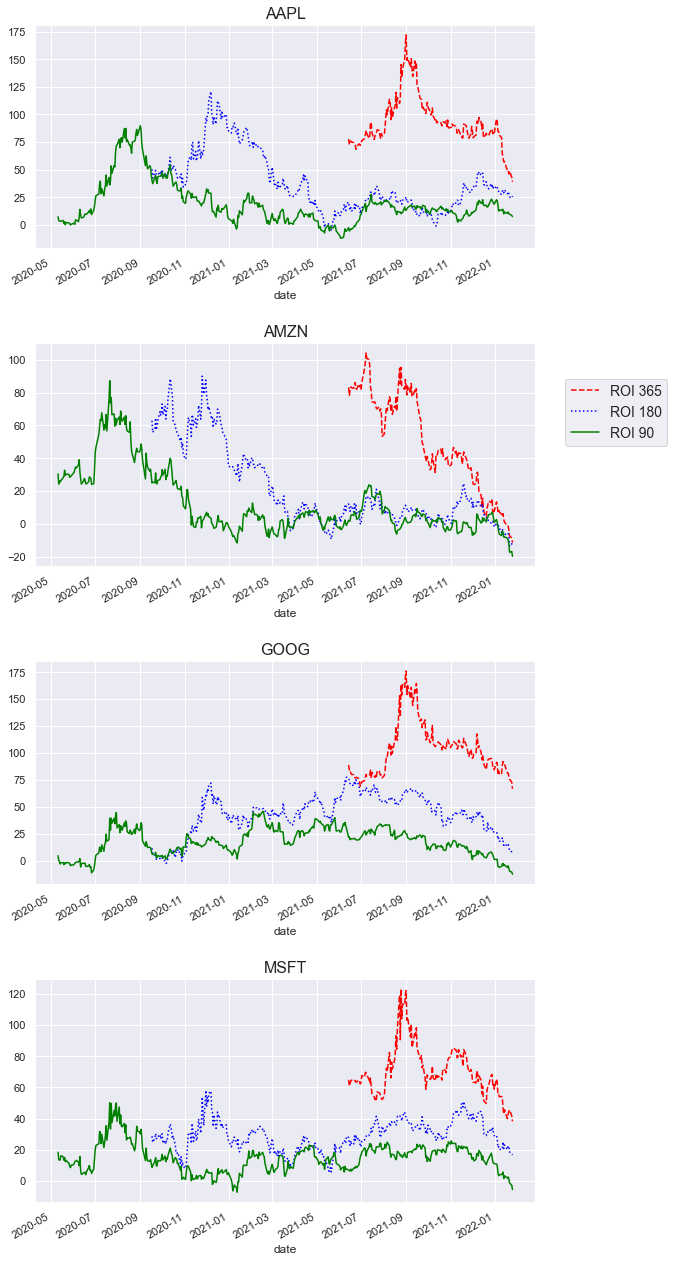

In [24]:
fig, axes = plt.subplots(nrows=4,figsize=(8,18))

newdf["ROI_AAPL_365"].plot(color = "red", linestyle="--", ax = axes[0])
newdf["ROI_AAPL_180"].plot(color = "blue", linestyle="dotted", ax = axes[0])
newdf["ROI_AAPL_90"].plot(color = "green", ax = axes[0])
axes[0].set_title("AAPL", fontsize =16)

newdf["ROI_AMZN_365"].plot(color = "red", linestyle="--", ax = axes[1])
newdf["ROI_AMZN_180"].plot(color = "blue", linestyle="dotted", ax = axes[1])
newdf["ROI_AMZN_90"].plot(color = "green", ax = axes[1])
axes[1].set_title("AMZN",fontsize =16)

newdf["ROI_GOOG_365"].plot(color = "red", linestyle="--", ax = axes[2])
newdf["ROI_GOOG_180"].plot(color = "blue", linestyle="dotted", ax = axes[2])
newdf["ROI_GOOG_90"].plot(color = "green", ax = axes[2])
axes[2].set_title("GOOG", fontsize =16)

newdf["ROI_MSFT_365"].plot(color = "red", linestyle="--", ax = axes[3])
newdf["ROI_MSFT_180"].plot(color = "blue", linestyle="dotted", ax = axes[3])
newdf["ROI_MSFT_90"].plot(color = "green", ax = axes[3])
axes[3].set_title("MSFT",fontsize =16)

fig.legend(['ROI 365', 'ROI 180', 'ROI 90'],bbox_to_anchor=(1.2, 0.7), fontsize = 14)
fig.tight_layout(pad=2.0)

### Question 5

The average ROI is a single number that comes from computing the overall mean of the ROI over the whole period of the series. Given these two portfolios, which one has the best average ROI, with a lookback of 365 days? (Keep in mind that ROI is a percentage and you can't average it directly - you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period)



   Portfolio 1:

       AAPL 40%

       GOOG 30%

       MSFT 20%

       AMZN 10%



   Portfolio 2:

       AAPL 30%

       GOOG 20%

       MSFT 10%

       AMZN 40%


In [25]:
#defining a function to calculate the Roi converted in currencies.

def roi_numerical (lookback, name, data): 
    IVI = data[f"{name}","close"].shift(lookback)
    ROI = (data[f"{name}","close"].pct_change(lookback))
    ROI_numerical = (ROI * IVI).mean()
    return ROI_numerical

In [26]:
#defining a function that calculates the average ROI of a portfolio with different weights of stocks.

# result for portolio 1 
def portfolio_opt (appl,goog,msft,amzn):
    optimized  = (roi_numerical(365,"AAPL",newdf)* appl )+ \
    (roi_numerical(365,"GOOG",newdf)* goog )+ \
    (roi_numerical(365,"MSFT",newdf)* msft )+ \
    (roi_numerical(365,"AMZN",newdf)* amzn)
    return optimized
portfolio_opt(0.4,0.3,0.2,0.1)

581.5783706794625

In [27]:
#result for portolio 2 

portfolio_opt(0.3,0.2,0.1,0.4)

737.9280807454622

### Question 6
Find a better combination in your portfolio. The new combination should beat the best portfolio that you found in the previous exercise.

In [28]:
# 1: generate 4 random numbers for which the sum is 1 
# 2: ingest these number in the function of question 4 
# 3: get the 4 of random numbers that give the highest value of the function for a number of iterations
#--> don't include a loop going back to the datset each time so you can have more iterations 

In [29]:

largest = 0
optimal = []
Rois = [roi_numerical(365,stocks,newdf) for stocks in stock]

#it's possible to change the number of iteration.
#the lower --> the faster and --> the least accurate is the result.

for i in range(100_000):
    #generating a list of 4 random numbers for which the sum is 100.
    g = (np.round(np.random.dirichlet(np.ones(4))*1,0))
    #using the previously defined function, and injecting the 4 numbers.
    best_portfolio = sum((Rois*g))
    
    if best_portfolio > largest:
        largest = best_portfolio
        optimal = g

print("The average ROI for a period of 365 is: ",\
      largest,"with the weights of Apple, Amazon, Google and Microsoft respectively being:",\
      optimal,)

The average ROI for a period of 365 is:  1407.19842736635 with the weights of Apple, Amazon, Google and Microsoft respectively being: [0. 0. 1. 0.]


It appears that a maximum weight on the Google stock is always giving the highest average ROI to the portfolio. So i can say that a 100% of the weight on Google would give the highest return. Yet i feel like it's important to illustrate this assumption.
So below you will find the plot with all the 365 ROI of all the stocks, with Google being in red. And we can see that for a while and also lately, Google's ROI has been higher than the others. It is also more stable in time. Meaning that it is best stock to get in full weight for your portfolio. 

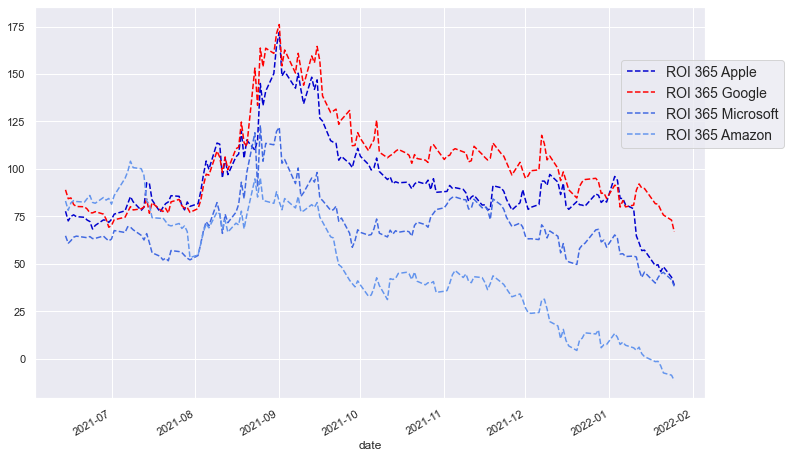

In [30]:
#ploting the 365 ROI of each stocks

fig, ax = plt.subplots(figsize=(12,8))

newdf["ROI_AAPL_365"].plot(color = "mediumblue", linestyle="--", ax = ax)
newdf["ROI_GOOG_365"].plot(color = "red", linestyle="--", ax = ax)
newdf["ROI_MSFT_365"].plot(color = "royalblue", linestyle="--", ax = ax)
newdf["ROI_AMZN_365"].plot(color = "cornflowerblue", linestyle="--", ax = ax)

fig.legend(['ROI 365 Apple', 'ROI 365 Google', 'ROI 365 Microsoft', 'ROI 365 Amazon'],\
           bbox_to_anchor=(1.0, 0.8), fontsize = 14)

In [31]:
# the best result you can get with the combination of portfolios is with 100% of Google

print("The highest average ROI is",portfolio_opt(0,1,0,0),"with 100% of Google")

The highest average ROI is 1407.19842736635 with 100% of Google
